In [50]:
import numpy as np
import matplotlib.pyplot as plt
import serial as Serial
import scipy.interpolate
from PIL import Image

# Generate sample image

In [43]:
# I generate a large image, with square proportions, to allow for some anti-aliasing, I guess.

sz = 2048
large = np.zeros([sz,sz])
large.shape

(2048, 2048)

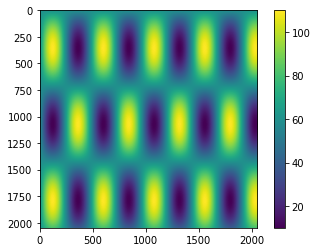

In [70]:
ns = np.linspace(0, np.pi*3, large.shape[0])
XX,YY = np.meshgrid(ns, ns)

ZZ = np.sin(XX*9/np.pi) * np.sin(YY/np.pi*3) * 50 + 60

plt.imshow(ZZ, interpolation=None)
plt.colorbar()

# Discretize image file

In [71]:
#load image (ZZ)

#resample into 256x256 points
def resample(image, res = 256):
    vecIn = np.linspace(0, 1, image.shape[0])
    XX, YY = np.meshgrid(vecIn, vecIn)
    interpolator = scipy.interpolate.interp2d(XX, YY, image)
    vecOut = np.linspace(0, 1, res)
    
    return interpolator(vecOut, vecOut)

    #Does not work for large-ish file sizes.

In [72]:
# PIL approach
image = Image.fromarray(ZZ)
resized = image.resize((256,256), resample=Image.BILINEAR)
#easy.

In [73]:
resized.show()

# Generate set of strings

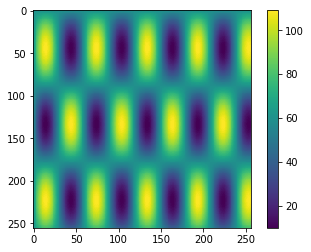

In [74]:
resizedArr = np.array(resized.getdata(), dtype=int).reshape(256,256)
plt.imshow(resizedArr)
plt.colorbar()

In [75]:
resizedArr

array([[60, 60, 60, ..., 60, 60, 60],
       [60, 60, 60, ..., 62, 62, 62],
       [60, 60, 61, ..., 64, 64, 64],
       ...,
       [61, 63, 66, ..., 84, 84, 83],
       [61, 63, 65, ..., 82, 82, 82],
       [61, 63, 65, ..., 81, 81, 80]])

# Pass to uController

The set of relevant commands are:
```cpp
    // Define relevant callback functions for the command structure
    sCmd.addCommand("MAN",      enableJoystick);
    sCmd.addCommand("REM",      disableJoystick);
    sCmd.addCommand("SCAN",     parseScanCommand);
    sCmd.addCommand("STEP",     setStepSize);
    sCmd.addCommand("MOVE",     parseMoveCommand);
    sCmd.addCommand("MOVETO",   parseMoveToCommand);
    sCmd.addCommand("GETPOS",   returnPosition);
    sCmd.addCommand("HOME",     homeAllAxis);
    sCmd.addCommand("HOMEX",    Xhome);
    sCmd.addCommand("HOMEY",    Yhome);
    sCmd.addCommand("CENTER",     setCenter);
    sCmd.addCommand("OPEN",     openShutter);
    sCmd.addCommand("CLOSE",    closeShutter);
    sCmd.setDefaultHandler(unrecognized);
```


### Timeline of commands:
 - Position manually to center position
 - Define as center position (CENTER command)
 - Define stepsize
 - Send line with SCAN command
 - Wait for functional response
 - Send next line with SCAN command
 - - Repeat as necessary.